In [1]:
import numpy as np
import pandas as pd

In [3]:
F=np.zeros((27,27))
F

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [4]:

input_file_name=f'D:/downloads/CaseNum_245Results.csv'
df = pd.read_csv(input_file_name,index_col=False)
df['V1']=0
df['PI7']=0
df['QI7']=0
df=df[['V1','PI2','PI3','PI7','PI8','PI10','PI11','PI12','PI14','QI2','QI3','QI7','QI8','QI10','QI11','QI12','QI14','PF12','PF23','PF42','PF47','PF49','PF52','PF54','PF56','PF613','PF79','PF116','PF1213','QF12','QF23','QF42','QF47','QF49','QF52','QF54','QF56','QF613','QF79','QF116','QF1213']]
df=df/100
df['V1']=1
output_file_name =f'D:/downloads/CaseNum_245Results_modified.csv'
df.to_csv(output_file_name,index=False)

In [6]:
df.shape

(10001, 41)

In [8]:
input_file_name=f'C:/Users/hp/Downloads/Z_BAD_248.csv'
df = pd.read_csv(input_file_name,index_col=False,header=None)
df2 = df.loc[df.index.repeat(5)]

# reset the index of the output dataframe
df2 = df2.reset_index(drop=True)
output_file_name = f'C:/Users/hp/Downloads/Z_BAD_248_modified.csv'
df2.to_csv(output_file_name,index=False,header=None)


In [5]:
df=pd.read_csv("data/validation_states2.csv")
x=df[f'Subsystem #1|CTLs|Vars|Vrms_1'][1]
print(x)

11.0136512


In [ ]:
# def hx(x):
#     H=HJacobian_at1(x)
#     print("H.shape",H.shape)
#     h222=np.dot(H, x)
#     print(h222.shape)
#     return h222

def hx(x):
    # measurement function
    # H = np.random.randn(dim_z, dim_x) # random matrix
    H=HJacobian_at1(x)
    print("H.shape",H.shape)
    hh=np.dot(H, x)
    print(hh.shape)
    return hh

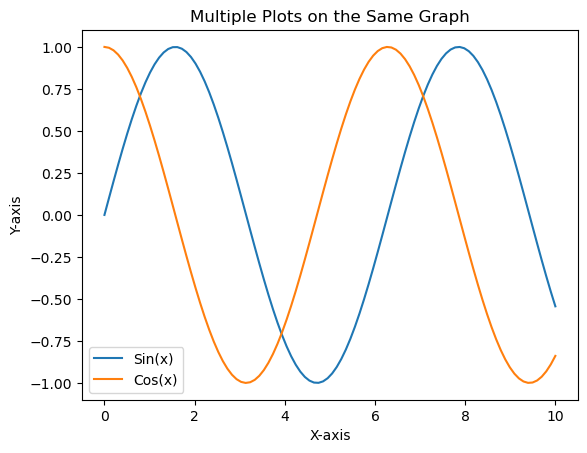

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot the first set of data
plt.plot(x, y1, label='Sin(x)')

# Plot the second set of data on the same graph
plt.plot(x, y2, label='Cos(x)')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Plots on the Same Graph')

# Add legend
plt.legend()

# Show the plot
plt.show()
